# _In-Silico_ Solvent Optimization Study

This is a test problem to compare how optimization with black-box algorithms does vs. with molecular descriptors.

You should describe the kinetic model used to generate experimental data and the nature of the pareto front.

In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
from surrogate_model_functions import plot_3d_model, loo_error
from solvent_optimization import descriptors_optimization, experiment, create_pcs_ds, pareto_front
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Solvent Dataset compressed to 3 principal components
solvent_ds_pcs = create_pcs_ds(num_components=3)

80 solvents for optimization
68.0% of variance is explained by 3 principal components.


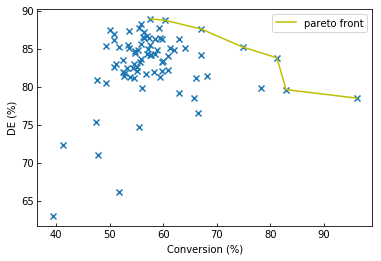

In [26]:
#Visualize all potential experiments
random_state = np.random.RandomState(1000)
all_experiments = [experiment(cas, solvent_ds_pcs, random_state) 
                   for cas in solvent_ds_pcs.index.values]
all_experiments = np.array(all_experiments)
pareto, pareto_indices = pareto_front(all_experiments)
ax = plt.subplot(111)
ax.set_xlabel('Conversion (%)'); ax.set_ylabel('DE (%)')
ax.scatter(all_experiments[:, 0], all_experiments[:, 1], marker='x')
ax.plot(pareto[:, 0], pareto[:, 1], c='y', label='pareto front')
ax.legend()
ax.tick_params(direction='in')
plt.savefig('outputs/in_silico_experiment_space.png')
plt.savefig('outputs/in_silico_experiment_space.svg')

In [16]:
#Dsiplay best solvent in conversion and diasteromeric excess respectively
max_idx = np.argmax(all_experiments, axis=0)
solvent_ds_pcs.iloc[pareto_indices, :]

,stenutz_name,cosmo_name,chemical_formula,solvent_class,solvent_name,PC_1,PC_2,PC_3
cas_number,,,,,,,,
56-81-5,"1,2,3-propanetriol",glycerol,C3H8O3,Alcohol,Glycerol,5.691078,3.500596,4.144049
123-92-2,3-methylbutyl acetate,isoamylacetate,C7H14O2,Ester,Isoamyl acetate,-2.501153,1.622836,-0.238475


In [21]:
#Optimization parameters
batch_size=8
num_batches=5
num_components=3
random_seed=1000

## 1. Black-Box Optimization

In [ ]:
#TODO

## 2.Molecular Descriptors Optimization

In [ ]:
descriptors_results = descriptors_optimization(batch_size=batch_size,
                                               num_batches=num_batches,
                                               num_components=num_components,
                                               random_seed=random_seed,
                                               save_to_disk=True)
experiments, lengthscales, log_likelihoods, loo_errors = descriptors_results

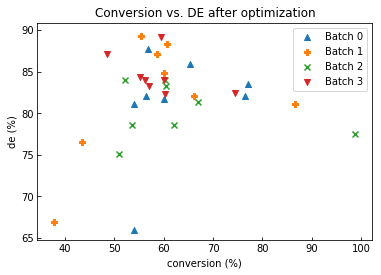

In [20]:
#Visualize the optimizationdata
plt.figure()
ax = plt.subplot(111)
ax.tick_params(direction='in')
markers = ['^', 'P', 'x', 'v', 'p', 'o', 's', '>', 'D', '<', '*']
for i in range(4): 
    data = experiments[experiments['batch']==float(i)].data_to_numpy()
    ax.scatter(data[:, 0], data[:, 1], marker=markers[i],label=f"Batch {i}")
ax.legend()
plt.xlabel('conversion (%)'); plt.ylabel('de (%)')
plt.title('Conversion vs. DE after optimization')
plt.savefig('outputs/solvent_optimization_molecular_descriptors.png')
plt.savefig('outputs/solvent_optimization_molecular_descriptors.svg')

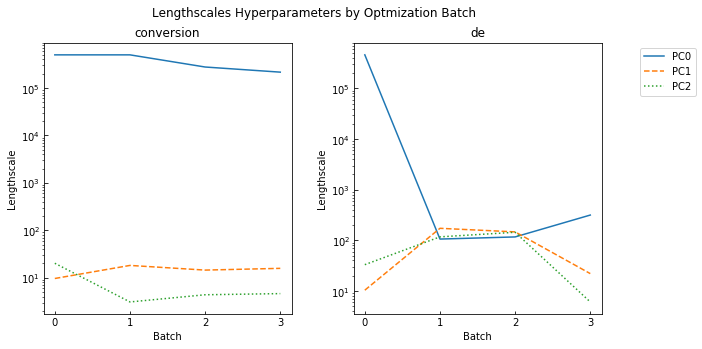

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.subplots_adjust(hspace=0.2, wspace=0.25)
linestyles = ['-', '--', ':']
titles = ['conversion', 'de']
for j, ax in enumerate(axes):
    for i in range(num_components):
        ax.plot(np.arange(0, num_batches-1, 1, dtype=int), lengthscales[:, i, j], 
                   linestyle=linestyles[i], label=f'PC{i}')
    ax.set_yscale('log')
    ax.set_ylabel('Lengthscale')
    ax.set_xlabel('Batch')
    ax.set_title(titles[j])
    ax.set_xticks(np.arange(0, num_batches-1, 1, dtype=int),minor=False)
    ax.tick_params(direction='in')
axes[1].legend(bbox_to_anchor=(1.4, 1))
fig.suptitle('Lengthscales Hyperparameters by Optmization Batch')
plt.savefig('outputs/solvent_optimization_molecular_descriptors_lengthscales.png')
plt.savefig('outputs/solvent_optimization_molecular_descriptors_lengthscales.svg')

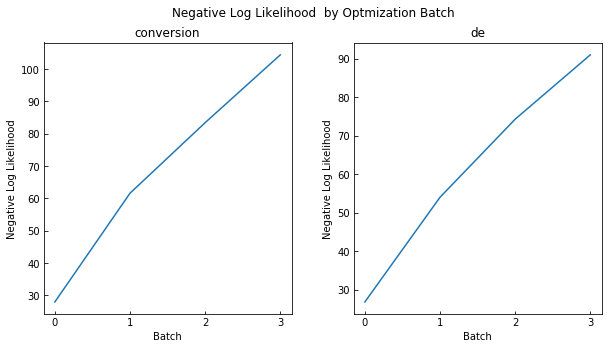

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.subplots_adjust(hspace=0.2, wspace=0.25)
linestyles = ['-', '--', ':']
for j, ax in enumerate(axes):
    ax.plot(np.arange(0, num_batches-1, 1, dtype=int), -log_likelihoods[:,j])
    ax.set_ylabel('Negative Log Likelihood')
    ax.set_xlabel('Batch')
    ax.set_title(titles[j])
    ax.set_xticks(np.arange(0, num_batches-1, 1, dtype=int),minor=False)
    ax.tick_params(direction='in')
fig.suptitle('Negative Log Likelihood  by Optmization Batch')
plt.savefig('outputs/solvent_optimization_molecular_descriptors_log_likelihood.png')
plt.savefig('outputs/solvent_optimization_molecular_descriptors_log_likelihood.svg')

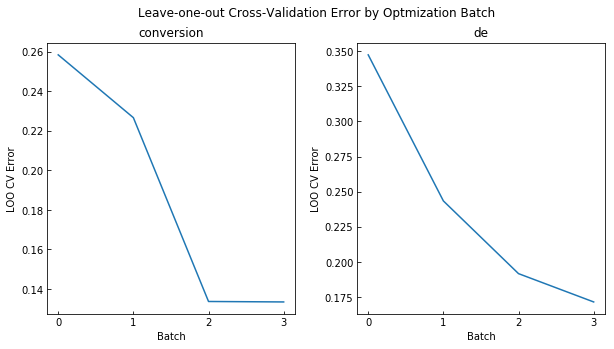

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.subplots_adjust(hspace=0.2, wspace=0.25)
linestyles = ['-', '--', ':']
for j, ax in enumerate(axes):
    ax.plot(np.arange(0, num_batches-1, 1, dtype=int), loo_errors[:,j])
    ax.set_ylabel('LOO CV Error')
    ax.set_xlabel('Batch')
    ax.set_title(titles[j])
    ax.set_xticks(np.arange(0, num_batches-1, 1, dtype=int),minor=False)
    ax.tick_params(direction='in')
fig.suptitle('Leave-one-out Cross-Validation Error by Optmization Batch')
plt.savefig('outputs/solvent_optimization_molecular_descriptors_loo_cv.png')
plt.savefig('outputs/solvent_optimization_molecular_descriptors_loo_cv.svg')